In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as stats, integrate
from scipy.stats import chi2_contingency
import seaborn as sns
import pandas as pd
import random
from numpy.random import randn
import pylab

### Question 1: Load the two datasets into pandas

In [2]:
crime = pd.read_csv('crime.csv')
vacant = pd.read_csv('Vacant_Buildings.csv')

In [275]:
crime.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NORTHWESTERN,NaN
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,HANDS,SOUTHWESTERN,Rognel Heights
2,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown
3,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown
4,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,HANDS,CENTRAL,Upton


In [276]:
vacant.head()

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0002 019 031016,0002,019,1909 W NORTH AVE,03/10/2016,EASTERWOOD,WESTERN,7,"(39.30952601, -76.64848892)"
1,0007 057 031116,0007,057,1734 APPLETON ST,03/11/2016,EASTERWOOD,WESTERN,7,"(39.30856758, -76.64921157)"
2,0125 012 030816,0125,012,522 N CAREY ST,03/08/2016,HARLEM PARK,WESTERN,9,"(39.29482152, -76.63877572)"
3,0151 009 030716,0151,009,317 N GILMOR ST,03/07/2016,FRANKLIN SQUARE,WESTERN,9,"(39.29261888, -76.64231678)"
4,0232 032 031116,0232,032,1324 W LOMBARD ST,03/11/2016,UNION SQUARE,SOUTHERN,9,"(39.28680988, -76.63888529)"


### Question 2: Indetify the types of the attributes in the two data sets(nominal, numeric ratio, binary, intervals,) gather this information in a"metadata" pandas

In [40]:
#Based on the output of the attributes below we can classify the attribute for criminal datasets as follow as
# Crime Date: Interval Scaled Attribute
# Crime Code: Countably infinite attribute
# Location: Nominal Attribute(here)
# Description: Nominal attribute
# NoticeDate: Interval Scale attribute
#Neighborhood: Nominal attribute
#Weapon: Nominal attribute
#PoliceDistrict: Ordinal attributes
#CounciDistrict: countably infinite attribute
crime.dtypes

CrimeDate       object
CrimeCode       object
Location        object
Description     object
Weapon          object
District        object
Neighborhood    object
dtype: object

In [41]:
#Based on the output of the attributes below we can classify the attribute for criminal datasets as follow as
# Reference ID: countably infinite attribute
# Block number: countably infinte attribute
#Lot:Nominal attribute
# Building Address: Nominal Attributes
# Notice Date: Interval-Scale Attributes
#Neighborhood: Nominal Attributes
# PoliceDistrict : Ordinal Attribute
#Council District: Countably infinite attribute
# Location: Numeric attribute
vacant.dtypes

ReferenceID        object
Block              object
Lot                object
BuildingAddress    object
NoticeDate         object
Neighborhood       object
PoliceDistrict     object
CouncilDistrict     int64
Location           object
dtype: object

In [130]:
#Here below describes the datasets
crime.describe

<bound method NDFrame.describe of          CrimeDate CrimeCode                    Location  \
0       10/14/2017        4A          2700 BEETHOVEN AVE   
1       10/14/2017        4E          4200 EDMONDSON AVE   
2       10/14/2017        4E  BALTIMORE ST & N HOWARD ST   
3       10/14/2017        4E  BALTIMORE ST & N HOWARD ST   
4       10/14/2017        4E          400 WALTON AV, AAC   
5       10/14/2017        9S               900 N EDEN ST   
6       10/14/2017        9S             1400 CARROLL ST   
7       10/14/2017        9S             1400 CARROLL ST   
8       10/14/2017        9S             200 S DALLAS CT   
9       10/14/2017      3AJF        500 N CARROLLTON AVE   
10      10/14/2017        4A               900 N EDEN ST   
11      10/14/2017        3K             1000 HERNDON CT   
12      10/14/2017        4E          1800 N CAROLINE ST   
13      10/14/2017       3AF             1400 CARROLL ST   
14      10/14/2017      3AJF              400 S MACON ST   
15    

### #Question 3: Demonstrate baisc statistical descriptions for attributes of your choice(at least two attributes, and at least one of each boxplot, histogram, quantile, plot, boxplot)

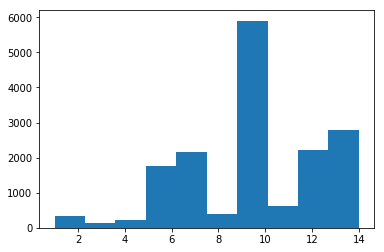

In [277]:
plt.hist(vacant.CouncilDistrict,bins=10, label='CouncilDistrict')
plt.show()

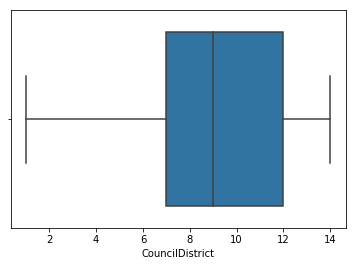

In [43]:
#below is the box plot which gives us the distribution of the council district values in vacant building datasets
sns.boxplot(vacant.CouncilDistrict)
plt.show()

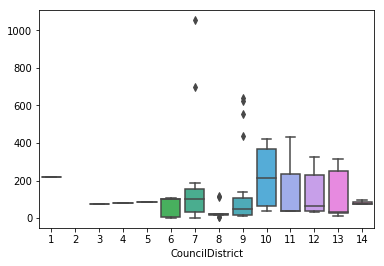

In [278]:
#this plot is the box plot versus the values of the various neighbor, though the
#The plot below gives us the estimate of the values of Unique Neighborhood in combination with Council District for
#for vacant building datasets
vacant_4 = vacant.Neighborhood.value_counts()
vacant_4.unique()
sns.boxplot(vacant.CouncilDistrict,vacant.Neighborhood.value_counts().unique())
plt.show()

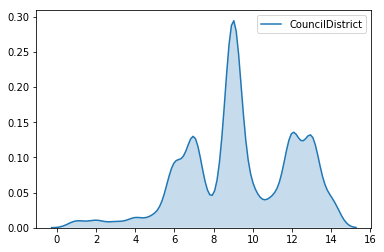

In [47]:
#Kernel Density Estimate Plot
#This plot gives us the information of the current density distribution of council district in vacant building dataset
sns.kdeplot(vacant.CouncilDistrict, shade = True)
plt.show()

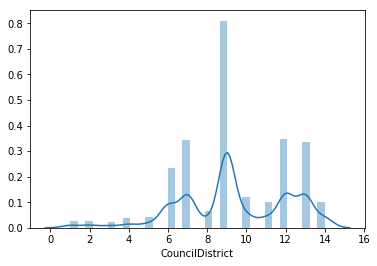

In [279]:
#Combining Kernel density plot woth histogram using distplot
sns.distplot(vacant.CouncilDistrict)
plt.show()

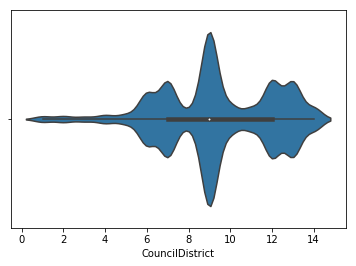

In [51]:
#Violinplot (just like box from we can get the value with high probability distributionfor Council District values)
sns.violinplot(vacant.CouncilDistrict)
plt.show()

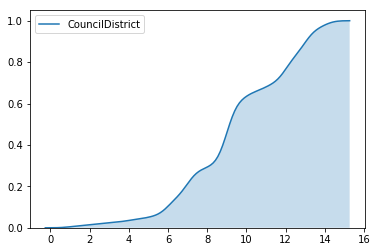

In [52]:
#Cumulative Distribution plot
#below is the distributuion of the council district values across various neighborhoods in vacant building datasets
sns.kdeplot(vacant.CouncilDistrict, shade = True, cumulative=True)
plt.show()

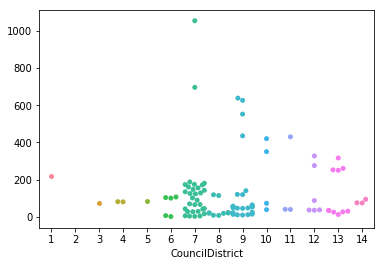

In [127]:
#Scatter plot of CouncilDistrict values verses the Neighborhood values on y - axis
#Data shown is the scattered plot data of all the values counts of neighborhood with respect to council district
sns.swarmplot(vacant.CouncilDistrict, vacant.Neighborhood.value_counts().unique())
plt.show()

In [54]:
#using value count method 
vacant_4 = vacant.Neighborhood.value_counts()
vacant_4.unique()

array([1054,  696,  638,  626,  552,  435,  430,  420,  350,  327,  316,
        275,  260,  252,  250,  219,  187,  180,  174,  173,  171,  160,
        155,  147,  142,  140,  134,  128,  125,  123,  120,  119,  118,
        114,  106,  103,  101,  100,   94,   89,   87,   86,   81,   80,
         76,   75,   74,   72,   69,   66,   65,   63,   62,   57,   55,
         53,   52,   48,   47,   46,   45,   44,   42,   41,   40,   39,
         38,   37,   36,   35,   34,   33,   30,   29,   28,   27,   26,
         25,   24,   23,   22,   21,   20,   19,   18,   17,   16,   15,
         14,   13,   12,   11,   10,    9,    8,    7,    6,    5,    4,
          3,    2,    1], dtype=int64)

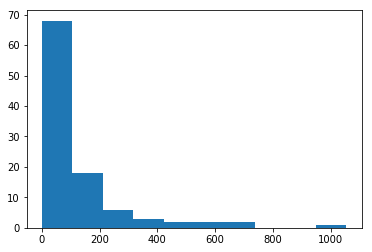

In [128]:
#Here is the histogram of the categorical values of neighborhood attribute in 
plt.hist(vacant_4.unique(), label='Neighborhood')
plt.show()

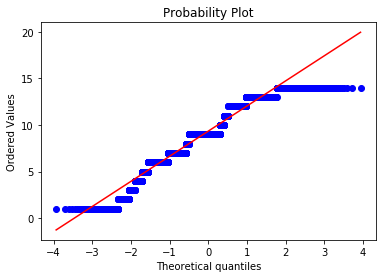

In [113]:
#Quantile plot for all the values of council district where are able to see the distribution of values 
stats.probplot(vacant.CouncilDistrict, dist="norm", plot=pylab)
pylab.show()

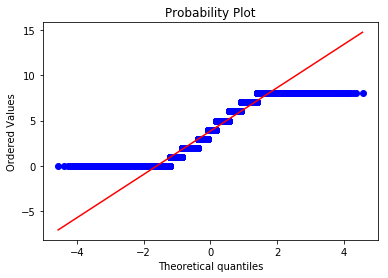

In [124]:
#Quantile -Quantile using District attribute of crime dataset
#below gives the distribuition of the district encoded values and categorizes each values
crime_x = crime.copy()
crime['District'] = crime['District'].astype('category')
crime_x['District_cat'] = crime_x['District'].cat.codes
stats.probplot(crime_x.District_cat, dist="norm", plot=pylab)
pylab.show()

### Question 4 : Use any two methods of your choice to convert non-numeric attributes of interest into numeric ones(e.g one hot encoding)

In [57]:
#The process of encoding is to the convert the attribute from data type object to category and then convert the non numeric 
#value to numeric onesI am copying my original data from crime to crime_1 and vacant to vacant_1
crime_1 = crime.copy()
vacant_1 = vacant.copy()
crime_1.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NORTHWESTERN,NaN
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,HANDS,SOUTHWESTERN,Rognel Heights
2,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown
3,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown
4,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,HANDS,CENTRAL,Upton


In [58]:
vacant_1.head()

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0002 019 031016,0002,019,1909 W NORTH AVE,03/10/2016,EASTERWOOD,WESTERN,7,"(39.30952601, -76.64848892)"
1,0007 057 031116,0007,057,1734 APPLETON ST,03/11/2016,EASTERWOOD,WESTERN,7,"(39.30856758, -76.64921157)"
2,0125 012 030816,0125,012,522 N CAREY ST,03/08/2016,HARLEM PARK,WESTERN,9,"(39.29482152, -76.63877572)"
3,0151 009 030716,0151,009,317 N GILMOR ST,03/07/2016,FRANKLIN SQUARE,WESTERN,9,"(39.29261888, -76.64231678)"
4,0232 032 031116,0232,032,1324 W LOMBARD ST,03/11/2016,UNION SQUARE,SOUTHERN,9,"(39.28680988, -76.63888529)"


In [61]:
#converting the column Description from the crime data set from object to columns
crime_1['Description'] = crime_1['Description'].astype('category')
crime_1['Weapon'] = crime_1['Weapon'].astype('category')
crime_1.dtypes

CrimeDate         object
CrimeCode         object
Location          object
Description     category
Weapon          category
District          object
Neighborhood      object
dtype: object

In [62]:
#Now using label enconding to convert the values from non-numeric to numeric
crime_1['Description_cat'] = crime_1['Description'].cat.codes
crime_1.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood,Description_cat
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NORTHWESTERN,NaN,0
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,HANDS,SOUTHWESTERN,Rognel Heights,5
2,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown,5
3,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown,5
4,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,HANDS,CENTRAL,Upton,5


In [64]:
#one hotcoding process
crime_1 =pd.get_dummies(crime_1, columns=["Weapon"]).head()
crime_1.head()

,CrimeDate,CrimeCode,Location,Description,District,Neighborhood,Description_cat,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_OTHER
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,NORTHWESTERN,NaN,0,1,0,0,0
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,SOUTHWESTERN,Rognel Heights,5,0,1,0,0
2,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,CENTRAL,Downtown,5,0,1,0,0
3,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,CENTRAL,Downtown,5,0,1,0,0
4,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,CENTRAL,Upton,5,0,1,0,0


### Question 5: Demonstrate two techniques for handling missing data on attributes of your choice.The first technique thayt has been adapted is the technique of removing Nan value using dropna function

In [63]:
#here I have taken out selected columns from the crime_1 data frame and indexed the 
filter_columns = ['Description', 'Weapon', 'Description_cat']
crime_2 = crime_1[filter_columns]
crime_2.head()

,Description,Weapon,Description_cat
0,AGG. ASSAULT,FIREARM,0
1,COMMON ASSAULT,HANDS,5
2,COMMON ASSAULT,HANDS,5
3,COMMON ASSAULT,HANDS,5
4,COMMON ASSAULT,HANDS,5


In [68]:
#I have set tje description value to index so that I can sort the data
crime_2 = crime_1.set_index(['Description']).dropna()
crime_2.head()

,CrimeDate,CrimeCode,Location,District,Neighborhood,Description_cat,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_OTHER
Description,,,,,,,,,,
COMMON ASSAULT,10/14/2017,4E,4200 EDMONDSON AVE,SOUTHWESTERN,Rognel Heights,5,0,1,0,0
COMMON ASSAULT,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,CENTRAL,Downtown,5,0,1,0,0
COMMON ASSAULT,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,CENTRAL,Downtown,5,0,1,0,0
COMMON ASSAULT,10/14/2017,4E,"400 WALTON AV, AAC",CENTRAL,Upton,5,0,1,0,0


In [69]:
#The first method for using missing value function of pandas is using 'dropna function, here i have applied it on the crime datasets, since we dont have much null values in Vacant buildings datasets I 
#I have applied the dropna function the indexed data as shown by crime data below
crime_2.head()

,CrimeDate,CrimeCode,Location,District,Neighborhood,Description_cat,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_OTHER
Description,,,,,,,,,,
COMMON ASSAULT,10/14/2017,4E,4200 EDMONDSON AVE,SOUTHWESTERN,Rognel Heights,5,0,1,0,0
COMMON ASSAULT,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,CENTRAL,Downtown,5,0,1,0,0
COMMON ASSAULT,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,CENTRAL,Downtown,5,0,1,0,0
COMMON ASSAULT,10/14/2017,4E,"400 WALTON AV, AAC",CENTRAL,Upton,5,0,1,0,0


In [129]:
#second method for dealing with missing values
crime_8 = crime.copy()
#filtering being applied here using fillna function
crime_8['Weapon']=crime_8['Weapon'].fillna(method='bfill')
crime_8.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NORTHWESTERN,NaN
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,HANDS,SOUTHWESTERN,Rognel Heights
2,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown
3,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown
4,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,HANDS,CENTRAL,Upton


In [22]:
vacant.head()

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0002 019 031016,0002,019,1909 W NORTH AVE,03/10/2016,EASTERWOOD,WESTERN,7,"(39.30952601, -76.64848892)"
1,0007 057 031116,0007,057,1734 APPLETON ST,03/11/2016,EASTERWOOD,WESTERN,7,"(39.30856758, -76.64921157)"
2,0125 012 030816,0125,012,522 N CAREY ST,03/08/2016,HARLEM PARK,WESTERN,9,"(39.29482152, -76.63877572)"
3,0151 009 030716,0151,009,317 N GILMOR ST,03/07/2016,FRANKLIN SQUARE,WESTERN,9,"(39.29261888, -76.64231678)"
4,0232 032 031116,0232,032,1324 W LOMBARD ST,03/11/2016,UNION SQUARE,SOUTHERN,9,"(39.28680988, -76.63888529)"


### Question 6: Two attributes of interest for potential outliers. Show the steps in your examination and reasoning Outlier are the values which are deviated from the current range may due to incorrect entry or due to irregular ditrbution of data

In [270]:
# Outlier can be detected by following below steps:
#They can be detected by clustering ,say we have large amount of data which is
#organised into groups or clusters. Thus the values which are deviated fromt these 
#group of cluster are regarded as outlier
#Here I have selected Lot attribute from vacant building data set to perform a check on outlier based on the Neighborhood.
vacant_7 = ['Block', 'Lot', 'Neighborhood', 'PoliceDistrict', 'CouncilDistrict', 'NoticeDate']
vacant_7 = vacant[vacant_7]
vacant_7.head()

,Block,Lot,Neighborhood,PoliceDistrict,CouncilDistrict,NoticeDate
0,0002,019,EASTERWOOD,WESTERN,7,03/10/2016
1,0007,057,EASTERWOOD,WESTERN,7,03/11/2016
2,0125,012,HARLEM PARK,WESTERN,9,03/08/2016
3,0151,009,FRANKLIN SQUARE,WESTERN,9,03/07/2016
4,0232,032,UNION SQUARE,SOUTHERN,9,03/11/2016


In [271]:
vacant_8 = vacant_7['Lot'].map(lambda x: str(x)[:-1])
vacant_8 = pd.DataFrame(vacant_8)
vacant_8.head()
#vacant_8.value_counts()

,Lot
0,01
1,05
2,01
3,00
4,03


In [272]:
vacant_7.update(vacant_8,  overwrite=True)
vacant_7['Lot'] = vacant_7['Lot'].astype(str).astype(int)
#vacant_7 = pd.DataFrame(vacant_7)
vacant_7.info()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  raise_on_error=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Data columns (total 6 columns):
Block              16559 non-null object
Lot                16559 non-null int32
Neighborhood       16559 non-null object
PoliceDistrict     16559 non-null object
CouncilDistrict    16559 non-null int64
NoticeDate         16559 non-null object
dtypes: int32(1), int64(1), object(4)
memory usage: 711.6+ KB


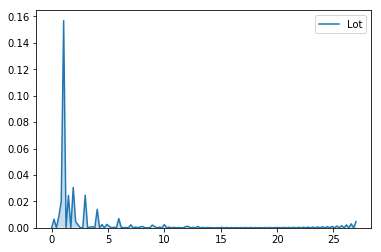

In [269]:
sns.kdeplot(vacant_7.Lot, shade = True)
plt.show()

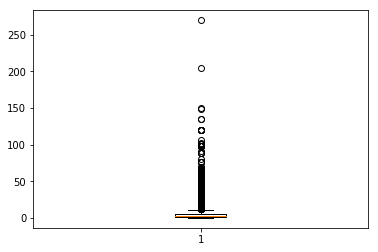

In [273]:
plt.boxplot(vacant_7.Lot)
plt.show()

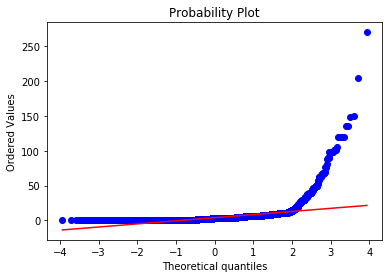

In [274]:
stats.probplot(vacant_7.Lot, dist="norm", plot=pylab)
pylab.show()

In [ ]:
#Thus from the above plot we are able to deduce that there are 
#potential outlier values present in the Lot attribute of the vacant building datasets
#We can see both the outlier values in box plot as well as in below quantile plot as well

### Question 7: Demonstrate a technique for examining the 'noise' in a data attribute of your choice and how to denoise it

In [134]:
#Noise is something which may be an error or may be something with irregularities in the attribute data, this may be due to wrong human entry or may 
#due to error in data collections
#Here I am checking the vacant Building dataset to find the irregularities in its attributes
#The attribute PoliceDistrict shows lots of irregularities in the naming convention, of its values which is show the poor data entry 
#below is the output of the data showing naming converntion irregularities
#Now we have extracted values which are small string characters from the Police District column where the values are only non 
#upper letterss
vacant_noise = vacant[vacant['PoliceDistrict'].str.contains("[a-z]")]
vacant_noise.head()

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
44,3969M123 031016,3969M,123,1640 NORTHGATE ROAD,03/10/2016,Hillen,Notheastern,3,"(39.34520722, -76.58768063)"
45,4131 021 030916,4131,021,1567 CARSWELL ST,03/09/2016,Coldstream Homestead Montebello,Notheastern,14,"(39.32227105, -76.59528329)"
46,4139 026 030916,4139,026,2738 HARFORD ROAD,03/09/2016,Coldstream Homestead Montebello,Notheastern,14,"(39.32126573, -76.59106094)"
90,1686 003 031516,1686,003,2031 ORLEANS ST,03/15/2016,CARE,Eastern,13,"(39.29518214, -76.5882701)"
111,3954 023 032116,3954,023,1717 E 30TH ST,03/21/2016,Coldstream Homestead Montebello,Notheastern,14,"(39.32513391, -76.59136773)"


In [164]:
vacant_denoise = (vacant_noise['PoliceDistrict'].str.upper())
vacant_denoise.head()

44     NOTHEASTERN
45     NOTHEASTERN
46     NOTHEASTERN
90         EASTERN
111    NOTHEASTERN
Name: PoliceDistrict, dtype: object

In [94]:
#Now I would denoise the data by converting the these small case nominal values to Upper case capital values
#Thus by converting the values of the PoliceDistrict i have denoised the attributes and the new dataframe vacant_1 look much more
#consistent as the dataframe is updated as shown below
vacant_1['PoliceDistrict'].str.upper()
vacant_1.update(vacant_denoise,  overwrite=True)
vacant_1.head(150)

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0002 019 031016,0002,019,1909 W NORTH AVE,03/10/2016,EASTERWOOD,WESTERN,7,"(39.30952601, -76.64848892)"
1,0007 057 031116,0007,057,1734 APPLETON ST,03/11/2016,EASTERWOOD,WESTERN,7,"(39.30856758, -76.64921157)"
2,0125 012 030816,0125,012,522 N CAREY ST,03/08/2016,HARLEM PARK,WESTERN,9,"(39.29482152, -76.63877572)"
3,0151 009 030716,0151,009,317 N GILMOR ST,03/07/2016,FRANKLIN SQUARE,WESTERN,9,"(39.29261888, -76.64231678)"
4,0232 032 031116,0232,032,1324 W LOMBARD ST,03/11/2016,UNION SQUARE,SOUTHERN,9,"(39.28680988, -76.63888529)"
5,0275 060 030716,0275,060,319 S MONROE ST,03/07/2016,CARROLLTON RIDGE,SOUTHERN,9,"(39.28383911, -76.64647246)"
6,0599 008 031116,0599,008,235 PARK AVE,03/11/2016,DOWNTOWN,CENTRAL,11,"(39.29280154, -76.6178644)"
7,0767 117 030816,0767,117,1329 SARGEANT ST,03/08/2016,WASHINGTON VILLAGE/PIGTOWN,SOUTHERN,10,"(39.28035426, -76.63645611)"
8,0855 008 030816,0855,008,622 ARCHER ST,03/08/2016,WASHINGTON VILLAGE/PIGTOWN,SOUTHERN,10,"(39.28160587, -76.63017981)"
9,1126 056 030716,1126,056,1532 N BOND ST,03/07/2016,OLIVER,EASTERN,12,"(39.30815721, -76.59707552)"


### Question 8: Demonstrate the creation for new attributes from existing attributes that would be useful in a preliminary assessment of dependency between crimes and building vacancies

In [85]:
vacant_new_att = vacant.copy()
crime_new_att = crime.copy()

In [135]:
#PART -1
#Here I have converted the Neighborhood data into categorical data where the values are numneric thus using this numeric data we
#we analyse the neighborhood attribute of both the dataset, further I can index the current Description attribute with Neighborhood attribute
#to get the data in more structured format would also be easy to analyse it further
crime_new_att['Neighborhood'] = crime['Neighborhood'].astype('category')
crime_new_att['Neighborhood_cat'] = crime_new_att['Neighborhood'].cat.codes
#crime_1['Description_cat'] = crime_1['Description'].cat.codes
#crime_new_att = crime_new_att.set_index('CrimeDate').dropna()
crime_new_att = crime_new_att.set_index('Neighborhood_cat').dropna()
crime_new_att.sort_values(by=['Neighborhood', 'Description']).head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
Neighborhood_cat,,,,,,,
15,09/12/2016,4B,2900 N CHARLES ST,AGG. ASSAULT,KNIFE,NORTHERN,Berea
15,01/26/2016,4A,3200 N CHARLES ST,AGG. ASSAULT,FIREARM,NORTHERN,Berea
15,01/01/2015,4B,5900 DAYWALT AVE,AGG. ASSAULT,KNIFE,NORTHEASTERN,Berea
15,04/26/2014,4D,3400 N CHARLES ST,AGG. ASSAULT,HANDS,NORTHERN,Berea
15,09/29/2012,4C,2900 N CHARLES ST,AGG. ASSAULT,OTHER,NORTHERN,Berea


In [136]:
#PART -2
#Now here I will creating a new data attribute from vacant buildings datasets
#Now here we will create  new attribute were I would categorizing police district which would equate to the new attribute of 
#neighborhood attribute created for crime dataset Thus it would act like dictionary by just taking the neighborhood value
#and district value from either set to find the crime relations to vacant buildings

vacant_new_att['Neighborhood'] = vacant['Neighborhood'].astype('category')
vacant_new_att['Neighborhood_vacant'] = vacant_new_att['Neighborhood'].cat.codes
#crime_1['Description_cat'] = crime_1['Description'].cat.codes
#crime_new_att = crime_new_att.set_index('CrimeDate').dropna()
vacant_new_att = vacant_new_att.set_index('Neighborhood_vacant').dropna()
vacant_new_att.sort_values(by=['Neighborhood', 'PoliceDistrict']).head()
#Thus I have created two new attributes Neighborhood and Neighborhood_vacant from attributes Neighborhood from each dataset
#Then I have assigned them as index values for easy sorting of data and considering their proximity and correlation, 
#we would be to able to analyse the data better

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
Neighborhood_vacant,,,,,,,,,
16,0390 020 072816,0390,020,141 E NORTH AVE,07/28/2016,BIDDLE STREET,CENTRAL,12,"(39.31084348, -76.61399149)"
16,0390 005 081211,0390,005,1809 SAINT PAUL ST,08/12/2011,BIDDLE STREET,CENTRAL,12,"(39.31016775, -76.61454998)"
16,0390 015 121215,0390,015,131 E NORTH AVE,12/12/2015,BIDDLE STREET,CENTRAL,12,"(39.31083269, -76.61428468)"
16,0391 045 033116,0391,045,231 E NORTH AVE,03/31/2016,BIDDLE STREET,EASTERN,12,"(39.31086903, -76.61257977)"
16,1096 006 050616,1096,006,428 E LAFAYETTE AVE,05/06/2016,BIDDLE STREET,EASTERN,12,"(39.31027783, -76.60984567)"


### Question9: Demonstrate how to reduce numerosity(#distinct values)of an attributesof your using binning; discuss your approach and other choices


In [137]:
#Bining is the technique used to for smoothing the data taking into consideration the value of it neighbours. The sorted values are
#distribut into number of "buckets" or bin.
#below is the process of bining which is performed on the vacant building datasets using the attribute CouncilDistrict
#1. identify the bin values and it bucket range ranges values
#2. The value of the bin is always one more than it bucket zone values
#3. Then use the cut function in pandas to cut the current attribute values into values zones
#4. add newly created attributes to the dataframes
bins = [0, 3, 6, 9, 12, 15]
group_zone = ['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4', 'Zone_5']
Zones = pd.cut(vacant_1['CouncilDistrict'], bins, labels=group_zone)
vacant_1['Zones'] = pd.cut(vacant_1['CouncilDistrict'], bins, labels=group_zone)
vacant_1['Zones_Ranges'] = pd.cut(vacant_1['CouncilDistrict'], bins)
group_zone
Zones.head()

0    Zone_3
1    Zone_3
2    Zone_3
3    Zone_3
4    Zone_3
Name: CouncilDistrict, dtype: category
Categories (5, object): [Zone_1 < Zone_2 < Zone_3 < Zone_4 < Zone_5]

In [170]:
pd.value_counts(vacant_1['Zones'])

Zone_3    7707
Zone_4    3610
Zone_5    2783
Zone_2    1989
Zone_1     470
Name: Zones, dtype: int64

In [171]:
vacant_1.head(10)

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Zones,Zones_Ranges
0,0002 019 031016,0002,019,1909 W NORTH AVE,03/10/2016,EASTERWOOD,WESTERN,7,"(39.30952601, -76.64848892)",Zone_3,"(6, 9]"
1,0007 057 031116,0007,057,1734 APPLETON ST,03/11/2016,EASTERWOOD,WESTERN,7,"(39.30856758, -76.64921157)",Zone_3,"(6, 9]"
2,0125 012 030816,0125,012,522 N CAREY ST,03/08/2016,HARLEM PARK,WESTERN,9,"(39.29482152, -76.63877572)",Zone_3,"(6, 9]"
3,0151 009 030716,0151,009,317 N GILMOR ST,03/07/2016,FRANKLIN SQUARE,WESTERN,9,"(39.29261888, -76.64231678)",Zone_3,"(6, 9]"
4,0232 032 031116,0232,032,1324 W LOMBARD ST,03/11/2016,UNION SQUARE,SOUTHERN,9,"(39.28680988, -76.63888529)",Zone_3,"(6, 9]"
5,0275 060 030716,0275,060,319 S MONROE ST,03/07/2016,CARROLLTON RIDGE,SOUTHERN,9,"(39.28383911, -76.64647246)",Zone_3,"(6, 9]"
6,0599 008 031116,0599,008,235 PARK AVE,03/11/2016,DOWNTOWN,CENTRAL,11,"(39.29280154, -76.6178644)",Zone_4,"(9, 12]"
7,0767 117 030816,0767,117,1329 SARGEANT ST,03/08/2016,WASHINGTON VILLAGE/PIGTOWN,SOUTHERN,10,"(39.28035426, -76.63645611)",Zone_4,"(9, 12]"
8,0855 008 030816,0855,008,622 ARCHER ST,03/08/2016,WASHINGTON VILLAGE/PIGTOWN,SOUTHERN,10,"(39.28160587, -76.63017981)",Zone_4,"(9, 12]"
9,1126 056 030716,1126,056,1532 N BOND ST,03/07/2016,OLIVER,EASTERN,12,"(39.30815721, -76.59707552)",Zone_4,"(9, 12]"


### Question10: Fuse/join information from two datasets(crime and vacanies) into a new panda merging of the datasets using the Neighborhood column which was common on both the datasets

In [138]:
#Question10: Fuse/join information from two datasets(crime and vacanies) into a new panda
#merging of the datasets using the Neighborhood column which was common on both the datasets
resultant_dataframe = (pd.merge(crime_1, vacant_1, on =['Neighborhood']))

In [139]:
resultant_dataframe.head()

,CrimeDate,CrimeCode,Location_x,Description,District,Neighborhood,Description_cat,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,...,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,PoliceDistrict,CouncilDistrict,Location_y,Zones,Zones_Ranges
0,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,SOUTHWESTERN,Rognel Heights,5,0,1,0,...,2510 034 021717,2510,034,711 WICKLOW ROAD,02/17/2017,Southwestern,8,"(39.29562421, -76.68697352)",Zone_3,"(6, 9]"
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,SOUTHWESTERN,Rognel Heights,5,0,1,0,...,2518 060 062117,2518,060,815 WICKLOW ROAD,06/21/2017,Southwestern,8,"(39.29632864, -76.68802761)",Zone_3,"(6, 9]"
2,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,SOUTHWESTERN,Rognel Heights,5,0,1,0,...,7958 021 071217,7958,021,1102 WALNUT AVE,07/12/2017,Southwestern,8,"(39.2966716, -76.69206526)",Zone_3,"(6, 9]"
3,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,SOUTHWESTERN,Rognel Heights,5,0,1,0,...,2527 030 072717,2527,030,4216 COLBORNE ROAD,07/27/2017,Southwestern,8,"(39.297836, -76.6874565)",Zone_3,"(6, 9]"
4,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,SOUTHWESTERN,Rognel Heights,5,0,1,0,...,2528C140 081517,2528C,140,1219 WICKLOW ROAD,08/15/2017,Southwestern,8,"(39.29884471, -76.69181186)",Zone_3,"(6, 9]"


In [70]:
resultant_dataframe_1 = (pd.merge(crime_1, vacant_1, left_on = 'District', right_on='PoliceDistrict').head(10))
resultant_dataframe_1.head()

,CrimeDate,CrimeCode,Location_x,Description,District,Neighborhood_x,Description_cat,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_OTHER,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood_y,PoliceDistrict,CouncilDistrict,Location_y
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,NORTHWESTERN,NaN,0,1,0,0,0,2755 010 031016,2755,010,3809 BONNER ROAD,03/10/2016,CONCERNED CITIZENS OF FOREST PARK,NORTHWESTERN,6,"(39.32267983, -76.68239714)"
1,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,NORTHWESTERN,NaN,0,1,0,0,0,2901 001 030716,2901,001,3701 W FOREST PARK AVE,03/07/2016,FOREST PARK,NORTHWESTERN,6,"(39.32520817, -76.67967628)"
2,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,NORTHWESTERN,NaN,0,1,0,0,0,3061A026 031116,3061A,026,3313 ALTO ROAD,03/11/2016,HANLON-LONGWOOD,NORTHWESTERN,7,"(39.31714857, -76.67350752)"
3,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,NORTHWESTERN,NaN,0,1,0,0,0,3176 028 031016,3176,028,2814 VIOLET AVE,03/10/2016,PARK CIRCLE,NORTHWESTERN,6,"(39.32986233, -76.66222642)"
4,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,NORTHWESTERN,NaN,0,1,0,0,0,4536A128 031116,4536A,128,5302 MAPLE AVE,03/11/2016,PIMLICO GOOD NEIGHBORS,NORTHWESTERN,5,"(39.35123971, -76.67777092)"


In [135]:
#why do we merge datasets
type(resultant_dataframe)

pandas.core.frame.DataFrame

In [74]:
#joining of two datasets 
#For joining the datasets there are few requisite steps that I would be performing on these
# dataset
#1. We select a common column present om crime data set representing District as index
#2. Then we will set index of the vacant building dataset using column Neighborhood as both these columns present same type of data
crime_5 = crime.set_index(['District'])
crime_5.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,Neighborhood
District,,,,,,
NORTHWESTERN,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NaN
SOUTHWESTERN,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,HANDS,Rognel Heights
CENTRAL,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,Downtown
CENTRAL,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,Downtown
CENTRAL,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,HANDS,Upton


In [75]:
vacant_5 = vacant.set_index(['PoliceDistrict'])
vacant_5.head()

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,CouncilDistrict,Location
PoliceDistrict,,,,,,,,
WESTERN,0002 019 031016,0002,019,1909 W NORTH AVE,03/10/2016,EASTERWOOD,7,"(39.30952601, -76.64848892)"
WESTERN,0007 057 031116,0007,057,1734 APPLETON ST,03/11/2016,EASTERWOOD,7,"(39.30856758, -76.64921157)"
WESTERN,0125 012 030816,0125,012,522 N CAREY ST,03/08/2016,HARLEM PARK,9,"(39.29482152, -76.63877572)"
WESTERN,0151 009 030716,0151,009,317 N GILMOR ST,03/07/2016,FRANKLIN SQUARE,9,"(39.29261888, -76.64231678)"
SOUTHERN,0232 032 031116,0232,032,1324 W LOMBARD ST,03/11/2016,UNION SQUARE,9,"(39.28680988, -76.63888529)"


In [76]:
result_join = pd.merge(crime_5, vacant_5, on=['Neighborhood'], how='outer', indicator=True)

In [77]:
result_join.head()

,CrimeDate,CrimeCode,Location_x,Description,Weapon,Neighborhood,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,CouncilDistrict,Location_y,_merge
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,10/14/2017,3AJO,NaN,ROBBERY - CARJACKING,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,07/30/2015,4C,NaN,AGG. ASSAULT,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,10/13/2017,6D,NaN,LARCENY FROM AUTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,12/27/2015,3AF,NaN,ROBBERY - STREET,FIREARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


### Question 11: Demonstrate data reduction using sampling techniques on subset of attributes

In [147]:
#Creating subsets of the datasets
crime_11 = crime.copy()
subset_1 = crime_11[['CrimeCode', 'Description', 'Neighborhood']]
subset_1

,CrimeCode,Description,Neighborhood
0,4A,AGG. ASSAULT,NaN
1,4E,COMMON ASSAULT,Rognel Heights
2,4E,COMMON ASSAULT,Downtown
3,4E,COMMON ASSAULT,Downtown
4,4E,COMMON ASSAULT,Upton
5,9S,SHOOTING,Oldtown
6,9S,SHOOTING,Washington Village/Pigtow
7,9S,SHOOTING,Washington Village/Pigtow
8,9S,SHOOTING,Perkins Homes
9,3AJF,ROBBERY - CARJACKING,Harlem Park


In [103]:
subset_2 = vacant_1[['ReferenceID', 'Lot', 'PoliceDistrict', 'CouncilDistrict']]
subset_2.head()

,ReferenceID,Lot,PoliceDistrict,CouncilDistrict
0,0002 019 031016,019,WESTERN,7
1,0007 057 031116,057,WESTERN,7
2,0125 012 030816,012,WESTERN,9
3,0151 009 030716,009,WESTERN,9
4,0232 032 031116,032,SOUTHERN,9


In [216]:
#performing sampling on the columns or dataframe without replacement
#here it will output of 20 sample values without replacement
crime_11.sample(n=20,frac=None, replace=True)

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
101833,09/25/2015,4E,4400 PARK HEIGHTS AVE,COMMON ASSAULT,HANDS,NORTHWESTERN,Central Park Heights
254901,07/25/2012,6J,3700 EDNOR RD,LARCENY,HANDS,NORTHEASTERN,Ednor Gardens-Lakeside
163506,06/17/2014,4E,4300 WABASH AV,COMMON ASSAULT,HANDS,NORTHWESTERN,Towanda-Grantley
277349,02/14/2012,5A,0 E 31ST ST,BURGLARY,HANDS,NORTHERN,Charles Village
256733,07/12/2012,6D,100 MARKET PL,LARCENY FROM AUTO,HANDS,CENTRAL,Inner Harbor
23384,05/05/2017,4F,4500 EDMONDSON AVE,ASSAULT BY THREAT,HANDS,SOUTHWESTERN,Rognel Heights
63862,07/19/2016,9S,5300 FRANKFORD AV,SHOOTING,FIREARM,NORTHEASTERN,Frankford
148810,10/04/2014,4D,1200 DELLWOOD AV,AGG. ASSAULT,HANDS,NORTHERN,Hampden
252172,08/12/2012,6J,200 W LAFAYETTE AV,LARCENY,HANDS,CENTRAL,Bolton Hill
40344,12/29/2016,4F,3700 YOLANDO RD,ASSAULT BY THREAT,HANDS,NORTHEASTERN,Ednor Gardens-Lakeside


In [143]:
##performing sampling on the columns or dataframe with 20% replacement
#Thus with replacement we see the data is extracted in small number 
crime_11.sample(frac=0.20, replace=True).head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
111574,07/23/2015,7A,1800 W LAFAYETTE AVE,AUTO THEFT,HANDS,WESTERN,Sandtown-Winchester
8495,08/14/2017,3CF,200 N PATTERSON PARK AVE,ROBBERY - COMMERCIAL,FIREARM,EASTERN,Patterson Place
274211,03/11/2012,5B,3200 LILY AV,BURGLARY,OTHER,SOUTHERN,Cherry Hill
121805,05/18/2015,3CF,400 W FRANKLIN ST,ROBBERY - COMMERCIAL,FIREARM,CENTRAL,Downtown
189858,11/14/2013,5A,1000 W 38TH ST,BURGLARY,HANDS,NORTHERN,Hampden


In [150]:
#stratified sampling
#for stratified sampling we would be converting the data into small subsets and then grouping them categorically
crime_11_s = crime.copy()
crime_11_s['District'] = crime_11_s['District'].astype('category')
crime_11_s['District_cat'] = crime_11_s['District'].cat.codes
crime_11_s.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood,District_cat
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NORTHWESTERN,NaN,4
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,HANDS,SOUTHWESTERN,Rognel Heights,7
2,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown,0
3,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown,0
4,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,HANDS,CENTRAL,Upton,0


In [154]:
#Now here the grouping of all rows that share the same Weapon and same District category
groupby_1 = crime_11_s.groupby(['Weapon', 'District_cat'])

In [200]:
groupby_1.size()
groupby_1.first(Weapon='FIREARM')

CrimeDate CrimeCode                    Location  \
Weapon  District_cat                                                     
FIREARM 0             10/13/2017      3AJF          1600 SAINT PAUL ST   
        1             10/14/2017        9S               900 N EDEN ST   
        2             10/13/2017        5C          5700 BIRCHWOOD AVE   
        3             10/14/2017        6G              1000 W 41ST ST   
        4             10/14/2017        4A          2700 BEETHOVEN AVE   
        5             10/14/2017        9S             200 S DALLAS CT   
        6             10/14/2017        9S             1400 CARROLL ST   
        7             10/14/2017        4A        2700 WASHINGTON BLVD   
        8             10/14/2017      3AJF        500 N CARROLLTON AVE   
HANDS   0             10/14/2017        4E  BALTIMORE ST & N HOWARD ST   
        1             10/14/2017        4E          1800 N CAROLINE ST   
        2             10/14/2017        7A             3400 HARFORD RD   
        3             10/14/2017        6C               600 W 33RD ST   
        4             10/14/2017        4F           4800 BEAUFORT AVE   
        5             10/14/2017        3B         ST & S PRESIDENT ST   
        6             10/14/2017        4E             400 S GILMOR ST   
        7             10/14/2017        4E          4200 EDMONDSON AVE   
        8             10/14/2017        4E              1300 MOSHER ST   
KNIFE   0             10/13/2017       3CK              0 W FAYETTE ST   
        1             10/14/2017        6J           2300 E LANVALE ST   
        2             10/13/2017        6E            1600 KINGSWAY RD   
        3             10/13/2017        6C               600 E 33RD ST   
        4             10/14/2017        7A           2900 FALLSTAFF RD   
        5             10/14/2017        4B          300 S HIGHLAND AVE   
        6             10/14/2017       3AK           AV & MARBOURNE AV   
        7             10/13/2017        4B             900 S CATON AVE   
        8             10/14/2017        4B           2000 N FULTON AVE   
OTHER   0             10/13/2017        4C          100 W LEXINGTON ST   
        1             10/12/2017       3AO             2200 HARFORD RD   
        2             10/14/2017        6B            3200 BATAVIA AVE   
        3             10/14/2017        6C              1000 W 41ST ST   
        4             10/13/2017        5C            4300 NORFOLK AVE   
        5             10/14/2017        5A        2500 E FAIRMOUNT AVE   
        6             10/14/2017        6E           800 BRIDGEVIEW RD   
        7             10/14/2017      3AJO          2300 N ROSEDALE ST   
        8             10/13/2017        6J            1200 N GILMOR ST   

                               Description      District  \
Weapon  District_cat                                       
FIREARM 0             ROBBERY - CARJACKING       CENTRAL   
        1                         SHOOTING       EASTERN   
        2                         BURGLARY  NORTHEASTERN   
        3                          LARCENY      NORTHERN   
        4                     AGG. ASSAULT  NORTHWESTERN   
        5                         SHOOTING  SOUTHEASTERN   
        6                         SHOOTING      SOUTHERN   
        7                     AGG. ASSAULT  SOUTHWESTERN   
        8             ROBBERY - CARJACKING       WESTERN   
HANDS   0                   COMMON ASSAULT       CENTRAL   
        1                   COMMON ASSAULT       EASTERN   
        2                       AUTO THEFT  NORTHEASTERN   
        3                          LARCENY      NORTHERN   
        4                ASSAULT BY THREAT  NORTHWESTERN   
        5                 ROBBERY - STREET  SOUTHEASTERN   
        6                   COMMON ASSAULT      SOUTHERN   
        7                   COMMON ASSAULT  SOUTHWESTERN   
        8                   COMMON ASSAULT       WESTERN   
KNIFE   0 

In [199]:
groupby_1.last()

CrimeDate CrimeCode               Location  \
Weapon  District_cat                                                
FIREARM 0             01/02/2012        6J          0 S GREENE ST   
        1             01/05/2012       3AF           700 ENSOR ST   
        2             01/01/2012        6D          4000 WHITE AV   
        3             01/01/2012        4A        500 OAKLAND AVE   
        4             01/03/2012        7A       5700 HIGHGATE DR   
        5             01/01/2012        6F          600 S BOND ST   
        6             01/01/2012        5D          3100 SAVOY ST   
        7             01/01/2012        4A        3500 CLIFTON AV   
        8             01/01/2012       3JF        700 N FULTON AV   
HANDS   0             01/01/2012        4E       600 E LOMBARD ST   
        1             01/01/2012        4E         600 N BROADWAY   
        2             01/01/2012        4E         3400 ELMLEY AV   
        3             01/01/2012        4E       300 ILCHESTER AV   
        4             01/01/2012        6E       3300 AVONDALE AV   
        5             01/01/2012        4E        200 S SPRING CT   
        6             01/01/2012        4E      1100 S CHARLES ST   
        7             01/01/2012        4E     2500 WASHINGTON BD   
        8             01/01/2012        4E     1200 W SARATOGA ST   
KNIFE   0             01/01/2012        6C           0 E NORTH AV   
        1             01/01/2012        6E        1100 N MACON ST   
        2             01/01/2012        6D     2800 E NORTHERN PW   
        3             01/01/2012        5D          500 RADNOR AV   
        4             01/01/2012        8H         3400 DUVALL AV   
        5             01/01/2012        6G         600 S BROADWAY   
        6             01/01/2012        4B       100 W JEFFREY ST   
        7             01/01/2012        5A        1800 LETITIA AV   
        8             01/01/2012        4B       1800 N MONROE ST   
OTHER   0             01/01/2012        5A          1700 EUTAW PL   
        1             01/01/2012        6E  400 N PATTERSON PK AV   
        2             01/01/2012        5A        5800 LILLYAN AV   
        3             01/02/2012        5B         4900 LANIER AV   
        4             01/01/2012       8EO    3700 W BELVEDERE AV   
        5             01/01/2012        4C         400 BOULDIN ST   
        6             01/01/2012        4C      1200 W LOMBARD ST   
        7             01/01/2012        5A      1900 GRINNALDS AV   
        8             01/01/2012        4C          2100 BAKER ST   

                              Description      District  \
Weapon  District_cat                                      
FIREARM 0                         LARCENY       CENTRAL   
        1                ROBBERY - STREET       EASTERN   
        2               LARCENY FROM AUTO  NORTHEASTERN   
        3                    AGG. ASSAULT      NORTHERN   
        4                      AUTO THEFT  NORTHWESTERN   
        5                         LARCENY  SOUTHEASTERN   
        6                        BURGLARY      SOUTHERN   
        7                    AGG. ASSAULT  SOUTHWESTERN   
        8             ROBBERY - RESIDENCE       WESTERN   
HANDS   0                  COMMON ASSAULT       CENTRAL   
        1                  COMMON ASSAULT       EASTERN   
        2                  COMMON ASSAULT  NORTHEASTERN   
        3                  COMMON ASSAULT      NORTHERN   
        4                         LARCENY  NORTHWESTERN   
        5                  COMMON ASSAULT  SOUTHEASTERN   
        6                  COMMON ASSAULT      SOUTHERN   
        7                  COMMON ASSAULT  SOUTHWESTERN   
        8                  COMMON ASSAULT       WESTERN   
KNIFE   0                         LARCENY       CENTRAL   
        1                         LARCENY       EASTERN   
        2               LARCENY FROM AUTO  NORTHEASTERN   
        3                        BURGLARY  

In [162]:
#Weapon would be read according to the District in which it was used
weapon_used = groupby_1.size().unstack()
weapon_used

District_cat,0,1,2,3,4,5,6,7,8
Weapon,,,,,,,,,
FIREARM,6048,5011,9125,6907,6394,7670,6497,5843,5057
HANDS,17760,12979,23912,17164,14999,21128,17559,14124,11711
KNIFE,3418,2526,4251,3199,2881,4194,3192,2643,2297
OTHER,5029,3682,6722,5011,4406,6214,5369,4199,3628


In [213]:
#Thus through sampling i am able to calculate the value of sum of weapons used in each district category 
weapon_used.sum()

District_cat
0    32255
1    24198
2    44010
3    32281
4    28680
5    39206
6    32617
7    26809
8    22693
dtype: int64

In [182]:
crime_11_s.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood,District_cat
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NORTHWESTERN,NaN,4
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,HANDS,SOUTHWESTERN,Rognel Heights,7
2,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown,0
3,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown,0
4,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,HANDS,CENTRAL,Upton,0


In [209]:
#Thus in stratified data we used groupby function ,thus we would be able to analyse 
#every 4 samples of particular crime category
#This was stratified sampling without replacement
grouped_1 =crime_11_s.groupby('Description',group_keys=False).apply(lambda x: x.sample(n=4, replace=True))
grouped_1

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood,District_cat
39991,12/31/2016,4C,1600 E 25TH ST,AGG. ASSAULT,OTHER,EASTERN,Darley Park,1
87395,01/11/2016,4B,1700 LAMONT AVE,AGG. ASSAULT,KNIFE,EASTERN,Oliver,1
280165,01/22/2012,4B,600 LAURENS ST,AGG. ASSAULT,KNIFE,CENTRAL,Upton,0
121597,05/19/2015,4C,1100 ENSOR ST,AGG. ASSAULT,OTHER,EASTERN,Johnston Square,1
227826,02/14/2013,8FO,800 ROUNDVIEW RD,ARSON,HANDS,SOUTHERN,Cherry Hill,6
64817,07/12/2016,8AO,500 E BALTIMORE ST,ARSON,HANDS,CENTRAL,Downtown,0
99449,10/13/2015,8J,5400 GIST AVE,ARSON,HANDS,NORTHEASTERN,Arlington,2
120892,05/24/2015,8H,2800 RUSCOMBE LN,ARSON,FIREARM,NORTHERN,Cylburn,3
266114,05/08/2012,4F,1700 W LEXINGTON ST,ASSAULT BY THREAT,HANDS,WESTERN,Franklin Square,8
131523,02/27/2015,4F,6000 FRANKFORD AVE,ASSAULT BY THREAT,HANDS,NORTHEASTERN,Frankford,2


In [211]:
#stratified sampling with replacement values
#This was stratified sampling with replacement of 20%
grouped_2 = crime_11_s.groupby('Description',group_keys=False).apply(lambda x: x.sample(frac=0.20, replace=True))
grouped_2

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood,District_cat
165568,06/02/2014,4A,300 S NORRIS ST,AGG. ASSAULT,FIREARM,SOUTHERN,New Southwest/Mount Clare,6
171813,04/15/2014,4B,2000 GREENMOUNT AVE,AGG. ASSAULT,KNIFE,EASTERN,Barclay,1
275572,02/29/2012,4B,5500 HILLTOP AV,AGG. ASSAULT,KNIFE,NORTHEASTERN,Waltherson,2
99859,10/10/2015,4B,3200 INGLESIDE AVE,AGG. ASSAULT,KNIFE,NORTHWESTERN,Pimlico Good Neighbors,4
177538,02/24/2014,4B,800 SEAGULL AV,AGG. ASSAULT,KNIFE,SOUTHERN,Cherry Hill,6
1805,10/01/2017,4B,5800 SIMMONDS AVE,AGG. ASSAULT,KNIFE,NORTHWESTERN,Glen,4
65936,07/03/2016,4C,1700 MADISON AVE,AGG. ASSAULT,OTHER,CENTRAL,Madison Park,0
80179,03/21/2016,4B,1200 DRUID HILL AVE,AGG. ASSAULT,KNIFE,CENTRAL,Upton,0
87058,01/14/2016,4D,500 N ATHOL AV,AGG. ASSAULT,HANDS,SOUTHWESTERN,Allendale,7
194266,10/15/2013,4C,3700 PARK HEIGHTS AV,AGG. ASSAULT,OTHER,NORTHWESTERN,Park Circle,4


In [161]:
#Here is the information of the data frame created after subsetting the data, now we will apply sampling technique 
weapon_used.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, FIREARM to OTHER
Data columns (total 9 columns):
0    4 non-null int64
1    4 non-null int64
2    4 non-null int64
3    4 non-null int64
4    4 non-null int64
5    4 non-null int64
6    4 non-null int64
7    4 non-null int64
8    4 non-null int64
dtypes: int64(9)
memory usage: 320.0+ bytes


### Question 12:For two categorical attributes of your choice, demonstrate the contingency table and conduct a chi -squared test of independence, explain your 


In [107]:
#Here I am converting two attributes District and PoliceDistrict
#'meric s values are crime and vavant building dataset to numeric data, 
#this will help us know the overlapping regions where the crime and 
#vacant building regions
crime_1['District'] = crime_1['District'].astype('category')
vacant_1['PoliceDistrict'] = vacant_1['PoliceDistrict'].astype('category')
crime_1['District_cat'] = crime_1['District'].cat.codes
vacant_1['PoliceDistrict_cat'] = vacant_1['PoliceDistrict'].cat.codes

In [118]:
contigency_table = pd.crosstab(vacant_1.CouncilDistrict, vacant_1.PoliceDistrict_cat, margins=True)
contigency_table

PoliceDistrict_cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,All
CouncilDistrict,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,76,0,0,87,0,0,0,0,163
2,0,0,0,0,2,0,0,0,0,130,23,0,0,18,0,0,0,0,173
3,0,0,0,0,3,0,0,0,0,131,0,0,0,0,0,0,0,0,134
4,0,0,0,0,0,134,0,76,0,23,0,0,0,0,0,0,0,0,233
5,0,0,0,0,0,4,175,0,88,0,0,0,0,0,0,0,0,0,267
6,0,0,0,0,0,178,1028,55,225,0,0,0,3,0,0,0,0,0,1489
7,181,49,0,0,0,8,62,14,30,0,0,0,282,0,0,60,1253,234,2173
8,0,0,0,0,0,0,19,0,22,0,0,0,242,0,0,122,0,0,405
9,0,0,0,0,0,0,0,0,0,0,0,781,1181,0,154,210,2462,341,5129


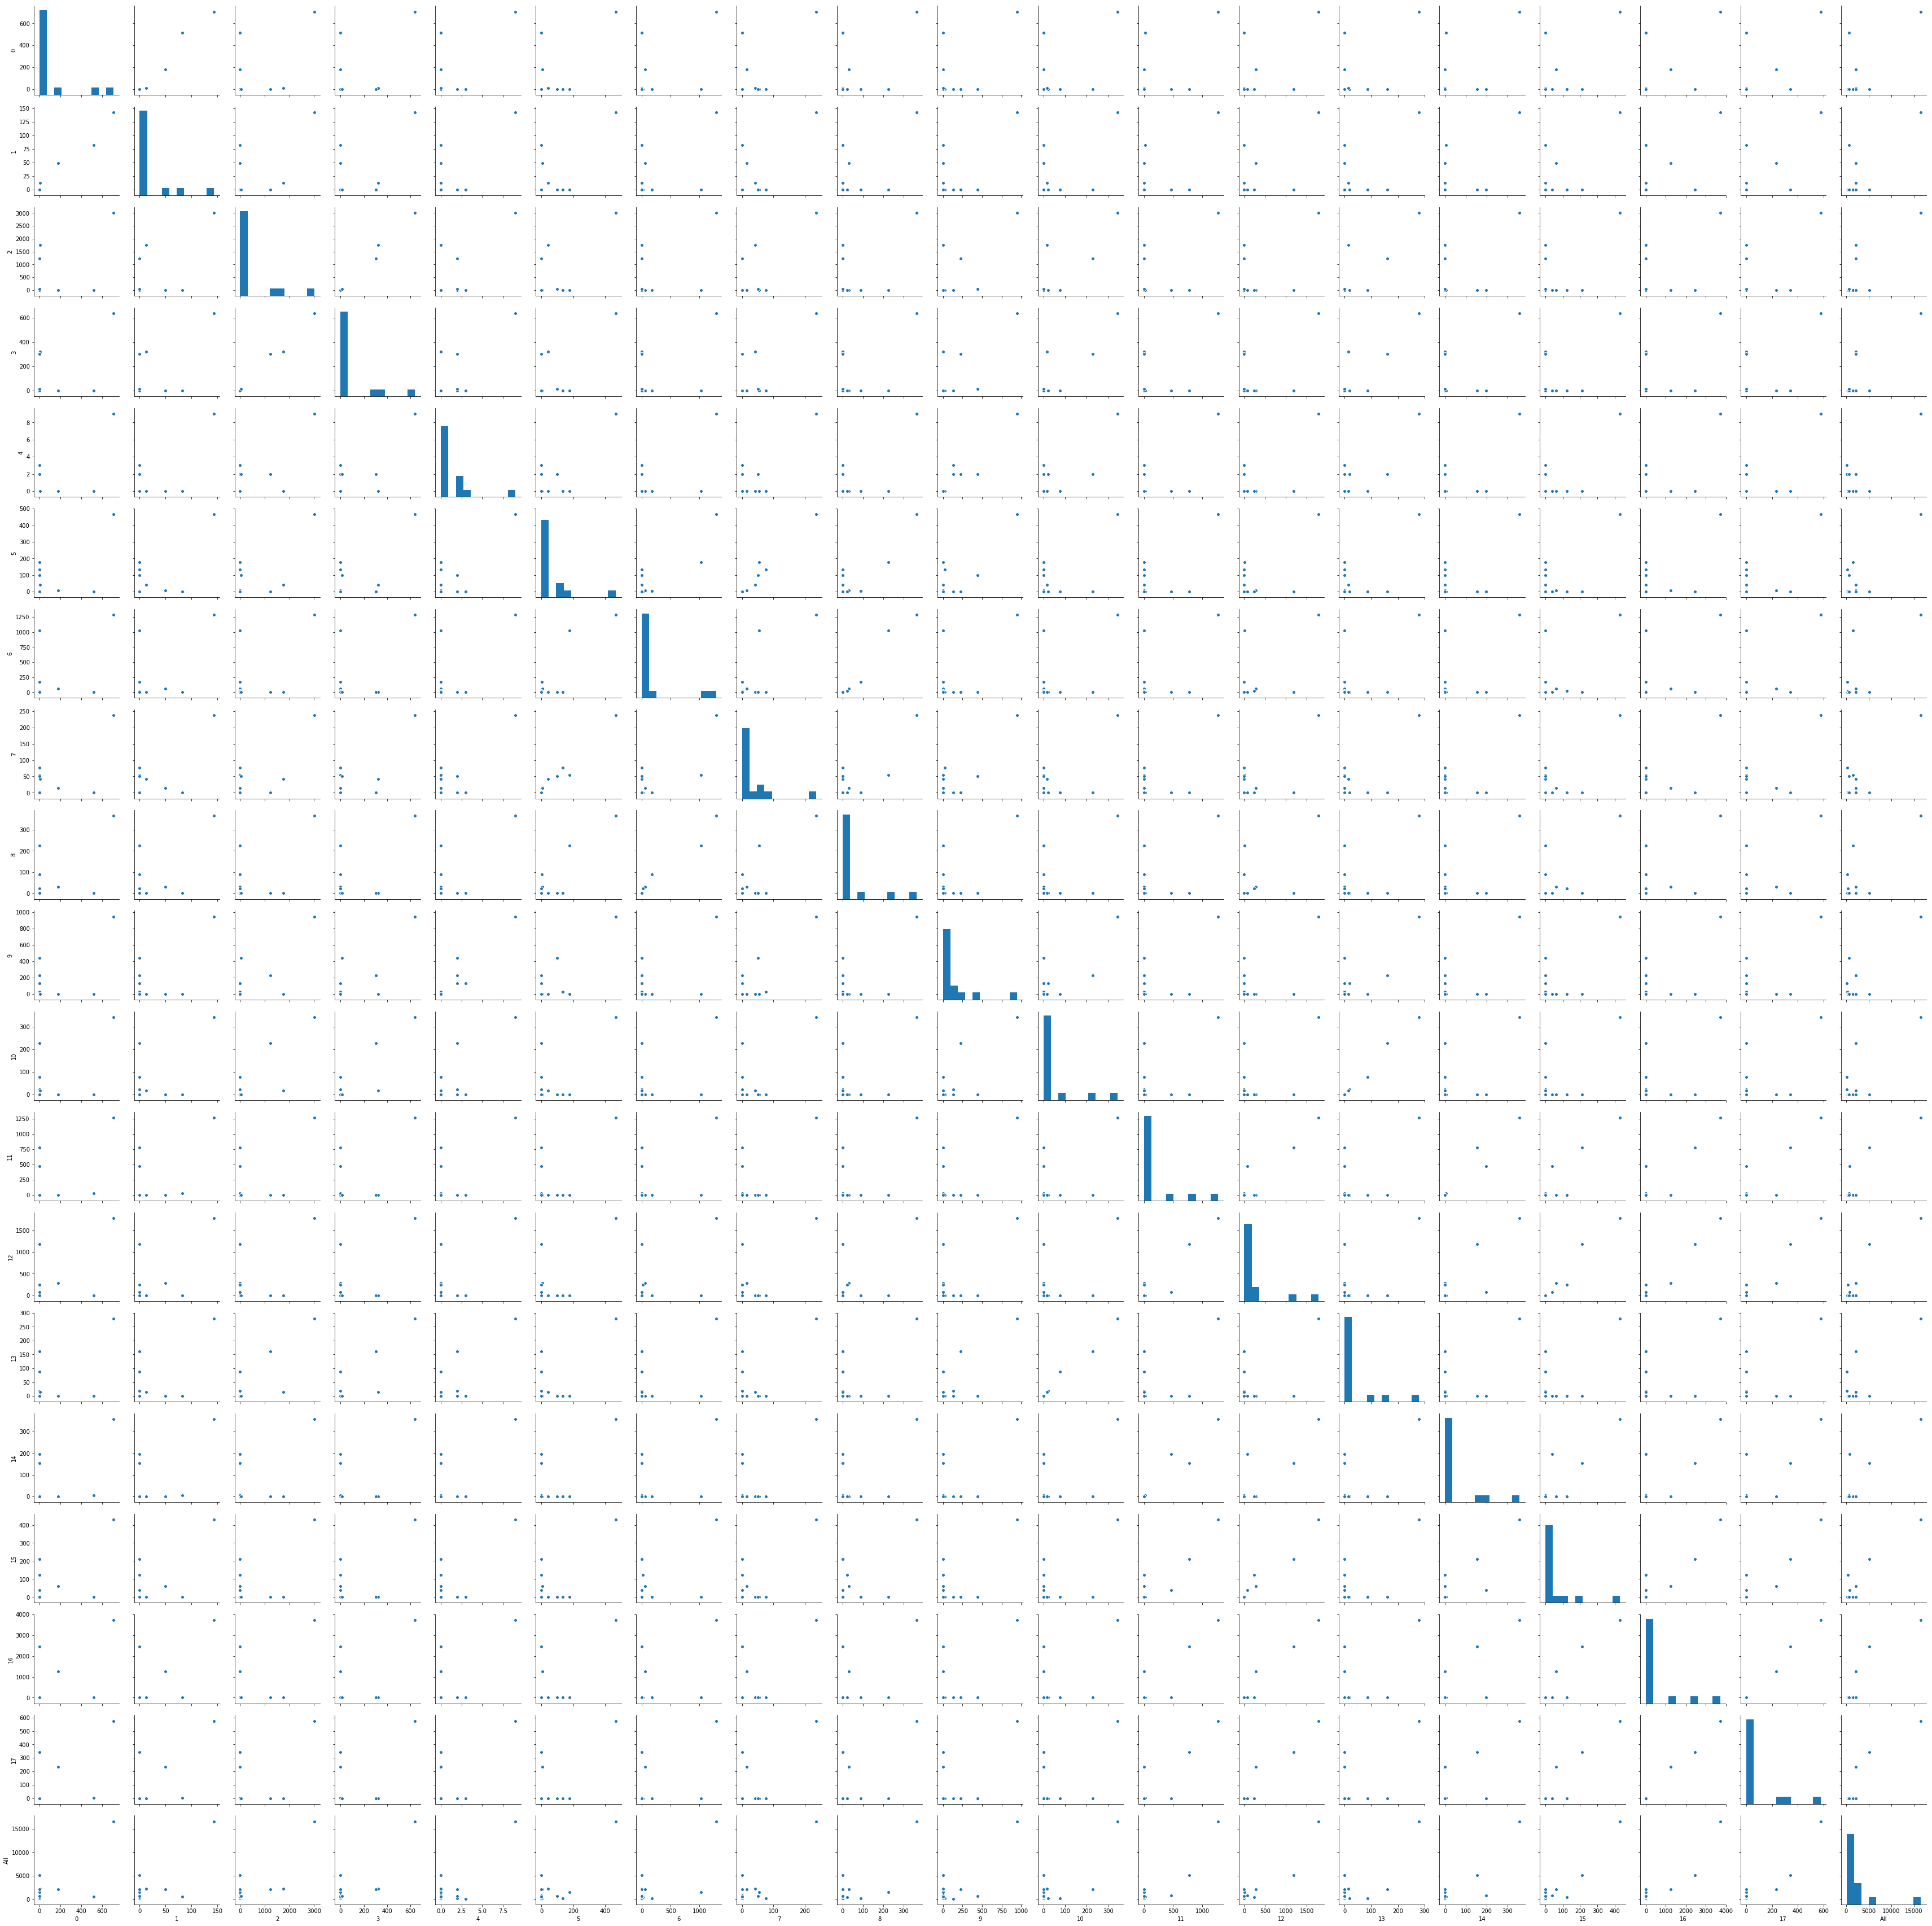

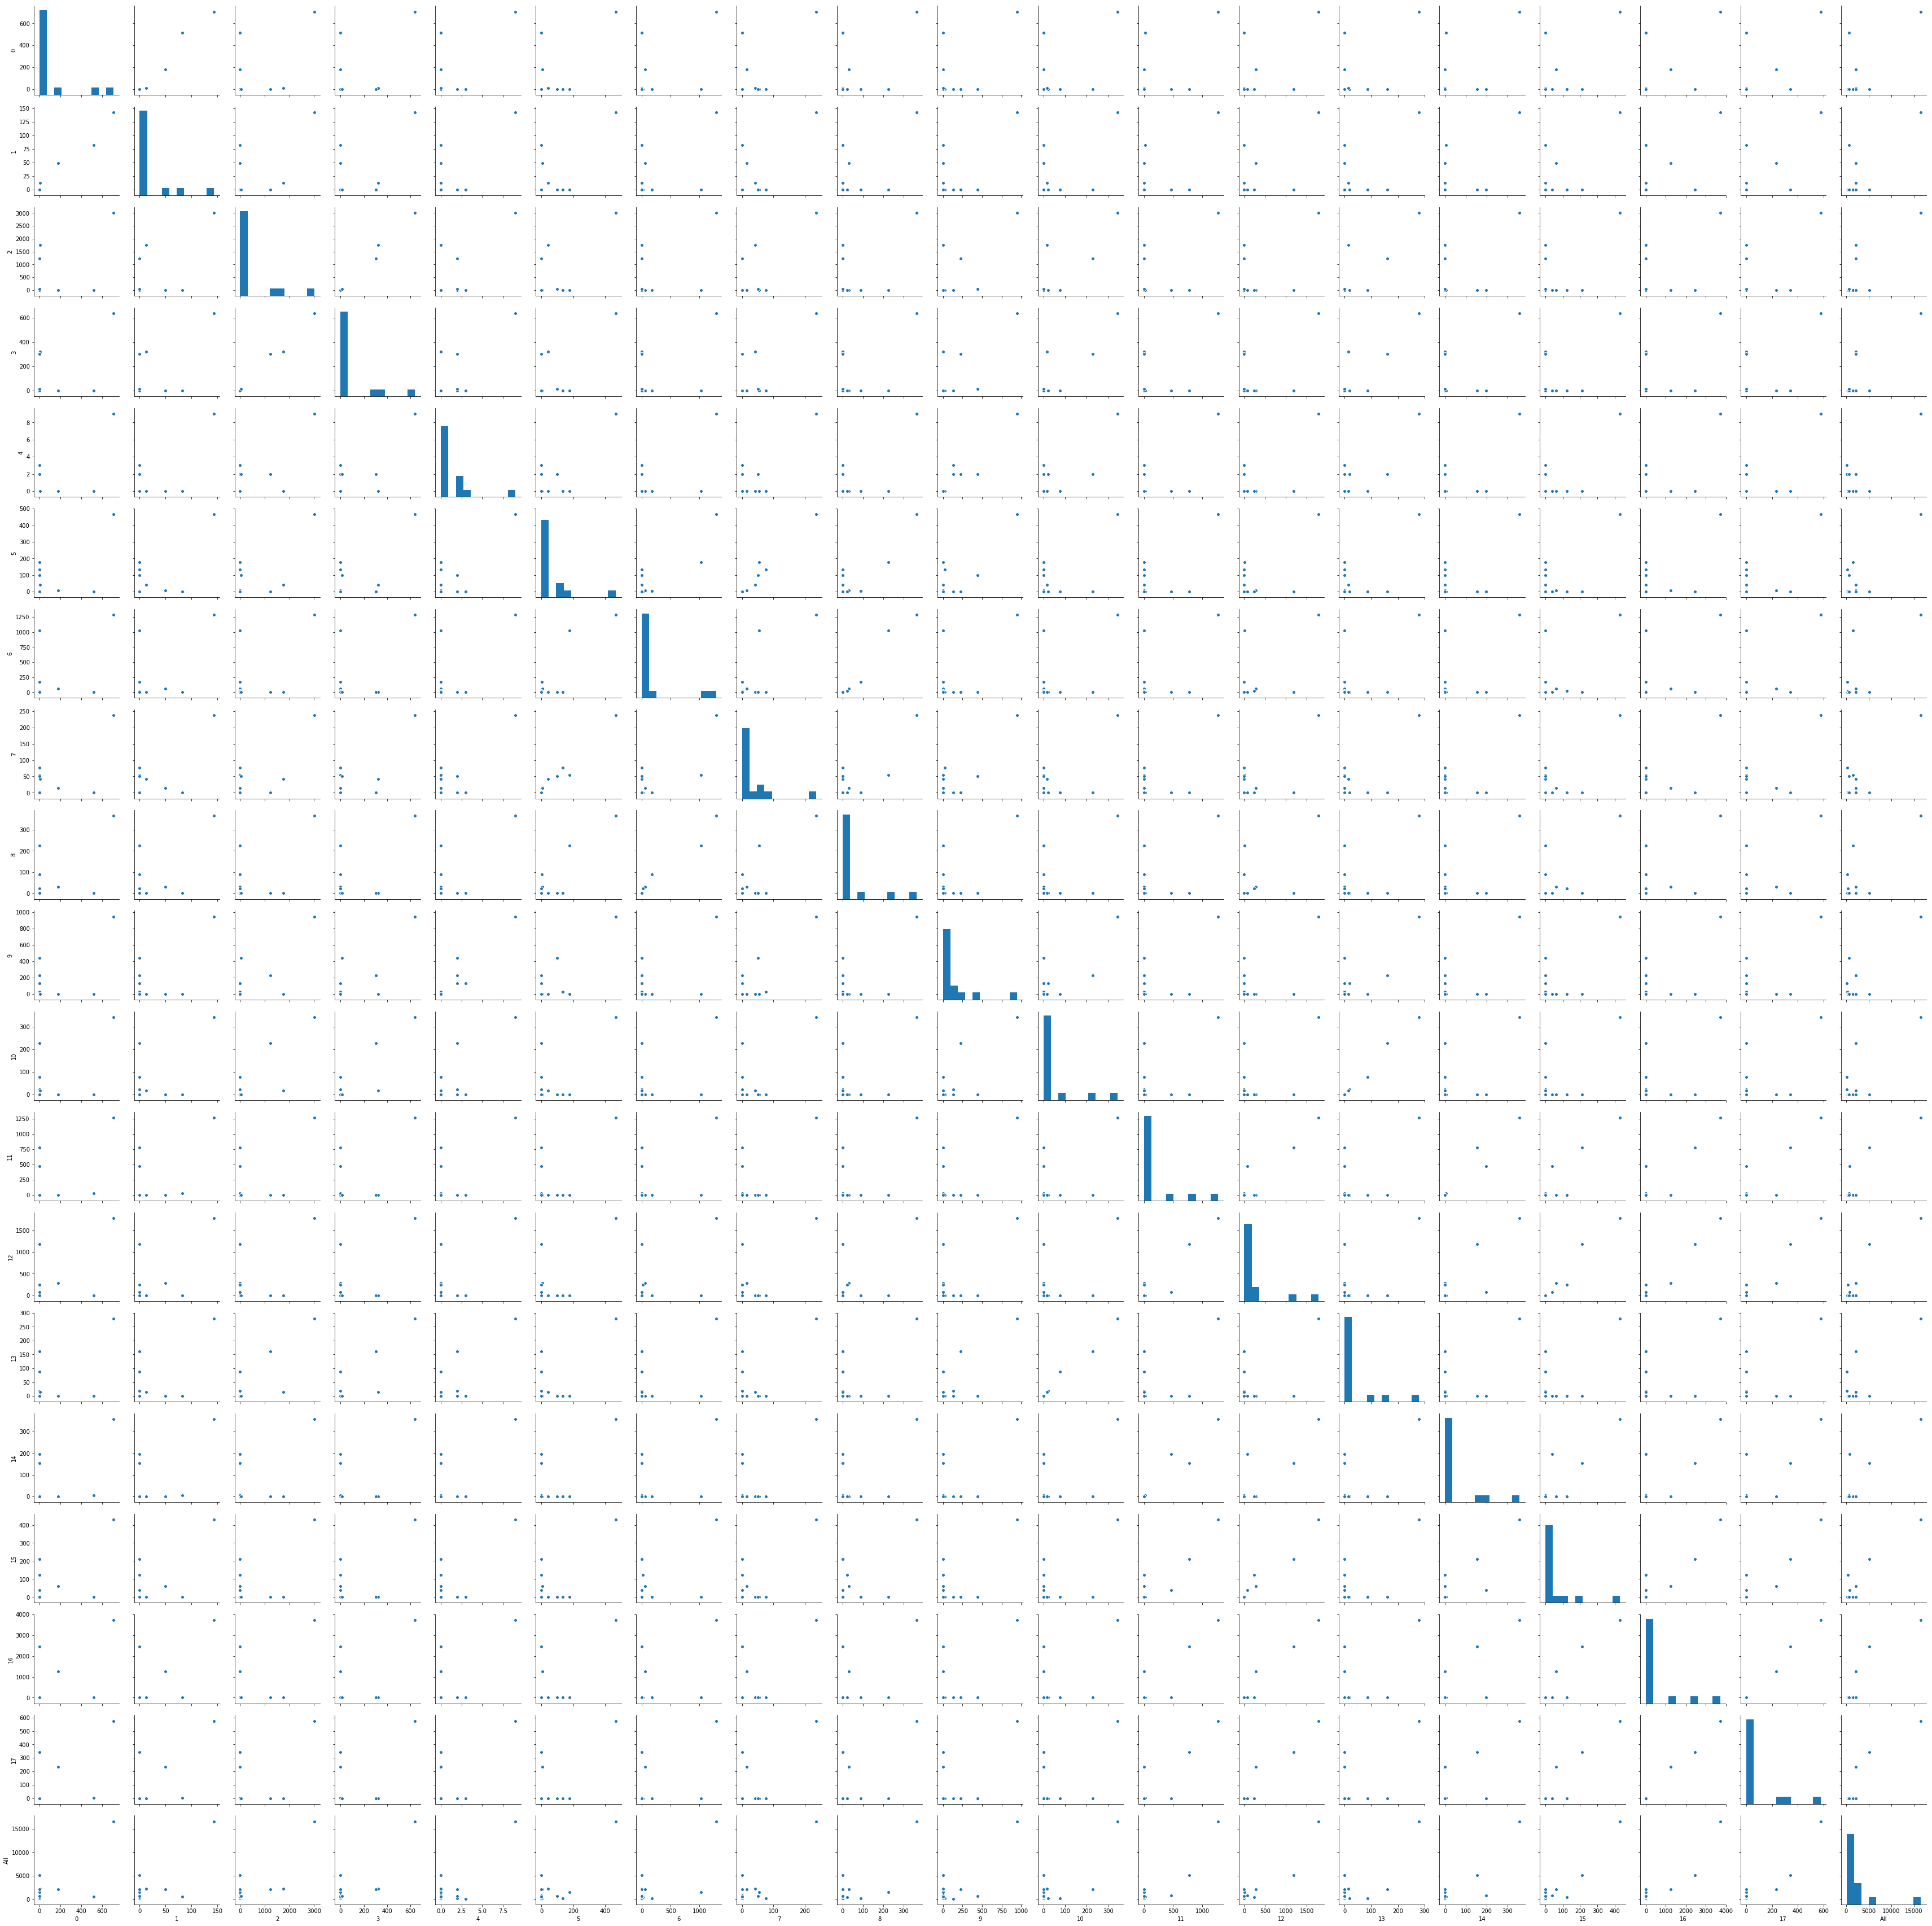

In [121]:
sns.pairplot(contigency_table)
plt.show()

In [138]:
chi2, R, dof, expected = chi2_contingency(contigency_table.values)
print('test_statistics',chi2)
print('The p-value of the test:',R)
print('Degreeof freedom: ',dof)
#print('The expected frequencies:',expected)
#print('Chi2-square Statisitics %0.3f p_value %0.3f'%(chi2,R))

test_statistics 69036.4740527
The p-value of the test: 0.0
Degreeof freedom:  252


In [139]:
#Thus from the above output we can conclude that the columns CouncilDistrict and 
#Police District are corelated to each other.

In [146]:
#Now trying to do Chi-Square test for two categorical columns from crime and vacant datasets
contigency_table_1 = pd.crosstab(crime_1.Location, vacant_1.Neighborhood, margins=True)
contigency_table_1

Neighborhood,EASTERWOOD,FRANKLIN SQUARE,HARLEM PARK,UNION SQUARE,All
Location,,,,,
2700 BEETHOVEN AVE,1,0,0,0,1
"400 WALTON AV, AAC",0,0,0,1,1
4200 EDMONDSON AVE,1,0,0,0,1
BALTIMORE ST & N HOWARD ST,0,1,1,0,2
All,2,1,1,1,5


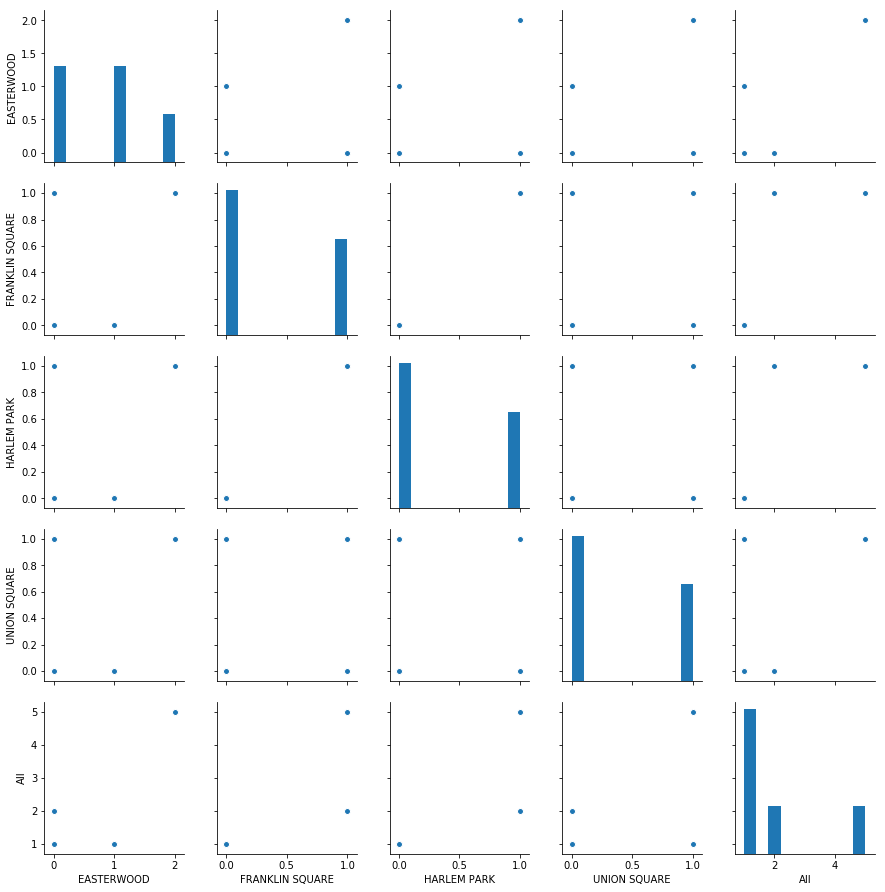

In [147]:
sns.pairplot(contigency_table_1)
plt.show()

In [151]:
#The scatter plot gives the relation between the columns from differernt datasets
#Below is the calculation of chisquared test for independence
chi2, R, dof, expected = chi2_contingency(contigency_table_1.values)
print('test_statistics',chi2)
print('The p-value of the test %0.3f:'%R)
print('Degreeof freedom: ',dof)

test_statistics 10.0
The p-value of the test 0.867:
Degreeof freedom:  16


In [152]:
#Now from the above result we can conclude that the columns Location in crime data set and 
#column Neighborhood in #vacant Building datasets are independent from
#chi-squared test as the p-value is greater than 0.05 (0.866)

### Question13 : For two numerical attributes of your choice, demonstrate the covariance matrix compute their correlation coefficient; explain/interpret your findings

In [116]:
#Here I have created a new dataframe of crime datasets where I am trying to demonstrate covariance matrix and computer the correlation 
#coefficient
crime_6 = crime.copy()
crime_6['Weapon'] = crime['Weapon'].astype('category')
crime_6['Description'] = crime['Description'].astype('category')

In [117]:
crime_6['Description_cat'] = crime_6['Description'].cat.codes
crime_6['Weapon_cat'] = crime_6['Weapon'].cat.codes
crime_6.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood,Description_cat,Weapon_cat
0,10/14/2017,4A,2700 BEETHOVEN AVE,AGG. ASSAULT,FIREARM,NORTHWESTERN,NaN,0,0
1,10/14/2017,4E,4200 EDMONDSON AVE,COMMON ASSAULT,HANDS,SOUTHWESTERN,Rognel Heights,5,1
2,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown,5,1
3,10/14/2017,4E,BALTIMORE ST & N HOWARD ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown,5,1
4,10/14/2017,4E,"400 WALTON AV, AAC",COMMON ASSAULT,HANDS,CENTRAL,Upton,5,1


In [118]:
#Below is the matrix derived by calculating covariance between the columns with category datatypes i.e between Weapon and Descriptoin
crime_6.cov()

,Description_cat,Weapon_cat
Description_cat,10.987316,-0.649660
Weapon_cat,-0.649660,0.891469


In [185]:
#Below function calculate pairwise correlation of columns and give below data output
crime_6.corr(method='kendall', min_periods=1)

,Weapon_cat,Description_cat
Weapon_cat,1.000000,-0.165685
Description_cat,-0.165685,1.000000


In [120]:
crime_6.corr(method='pearson', min_periods=1)

,Description_cat,Weapon_cat
Description_cat,1.000000,-0.207581
Weapon_cat,-0.207581,1.000000


In [121]:
crime_6.corr(method='spearman', min_periods=1)

,Description_cat,Weapon_cat
Description_cat,1.000000,-0.179151
Weapon_cat,-0.179151,1.000000
